In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from windrose import WindroseAxes

In [2]:
df = pd.read_csv("windRose/wind_t0129_giornaliero.csv" , sep=",", index_col=0,
                skiprows=[0,1,3], usecols=[1,3])

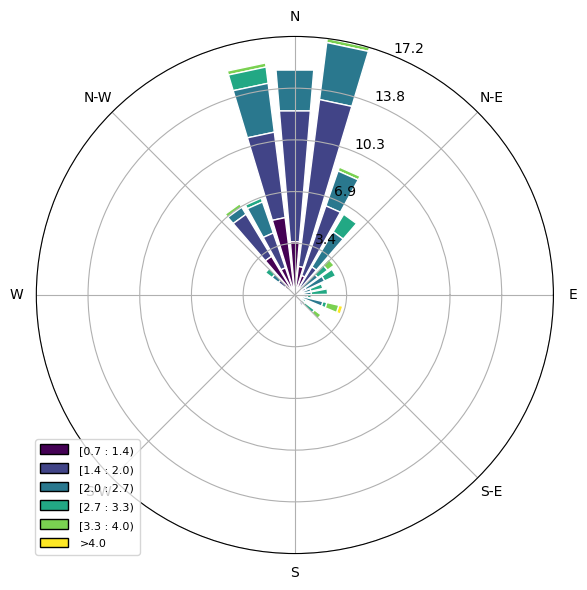

In [4]:
fig= plt.figure(figsize=(6,6), tight_layout=True)
ax = fig.add_subplot(projection="windrose")
#ax = WindroseAxes.from_ax()
ax.bar(df.dirVento.values, df.velVento.values, 
        normed=True, opening=0.8, edgecolor="white", nsector=30)
ax.set_legend()
#fig.savefig("export/windRose.pdf")

In [5]:
STOP

NameError: name 'STOP' is not defined

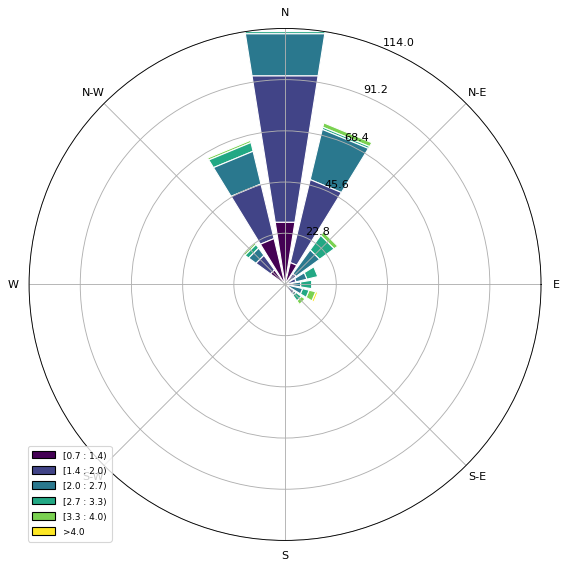

In [ ]:
ax = WindroseAxes.from_ax()
ax.bar(df.dirVento, df.velVento, opening=0.8, edgecolor="white")
ax.set_legend()

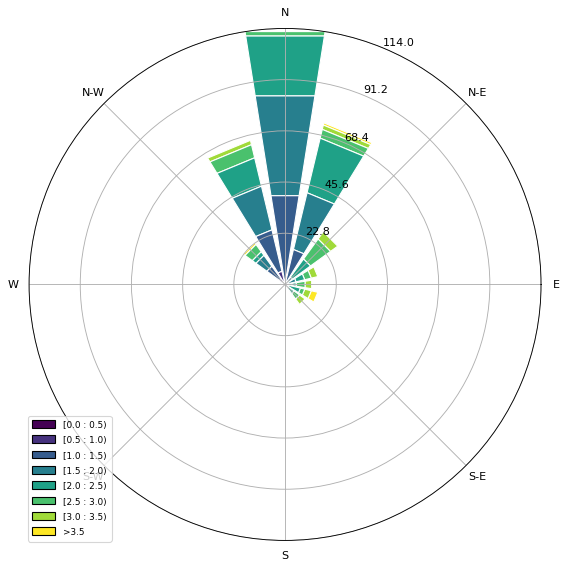

In [ ]:
ax = WindroseAxes.from_ax()
ax.bar(df.dirVento, df.velVento, bins=np.arange(0,4,.5), edgecolor="white")
ax.set_legend()

Trento laste da ottobre 2012 a ottobre 2022, valori giornalieri

In [65]:
df_vel = pd.read_csv("windRose/t0129_velocita.csv" , sep=",", index_col=0,
                skiprows=[0,1,2,3], usecols=[0,1,2], parse_dates=True, 
                names=["date","velocity", "quality_velocity"])

df_dir = pd.read_csv("windRose/t0129_direzione.csv" , sep=",", index_col=0,
                skiprows=[0,1,2,3], usecols=[0,1,2], parse_dates=True, 
                names=["date","direction", "quality_direction"])

df = df_vel.join(df_dir)
df

,velocity,quality_velocity,direction,quality_direction
date,,,,
2012-01-10,1.6,1,341,1
2012-02-10,1.6,1,26,1
2012-03-10,1.6,1,52,1
2012-04-10,3.0,1,58,1
2012-05-10,1.5,1,48,1
...,...,...,...,...
2022-09-27,1.9,1,28,1
2022-09-28,1.2,1,327,1
2022-09-29,1.0,1,340,1


Text(0.5, 1.0, 'Rosa dei venti - stazione Trento (Laste) - Periodo ott. 2012 - ott. 2022')

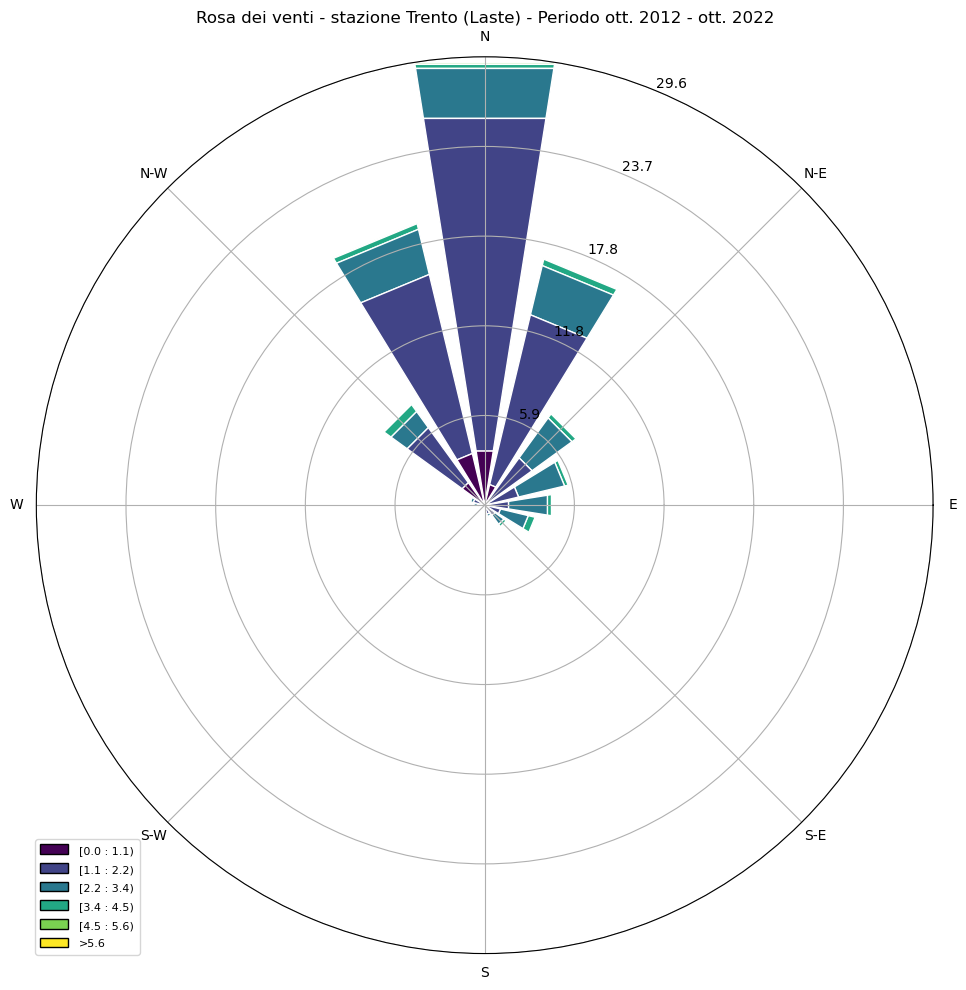

In [4]:
fig= plt.figure(figsize=(10,10), tight_layout=True)
ax = fig.add_subplot(projection="windrose")
#ax = WindroseAxes.from_ax()
ax.bar(df.direction, df.velocity, 
        normed=True, opening=0.8, edgecolor="white", nsector=16)
ax.set_legend()
ax.set_title("Rosa dei venti - stazione Trento (Laste) - Periodo ott. 2012 - ott. 2022")
#fig.savefig("export/windRose.pdf")

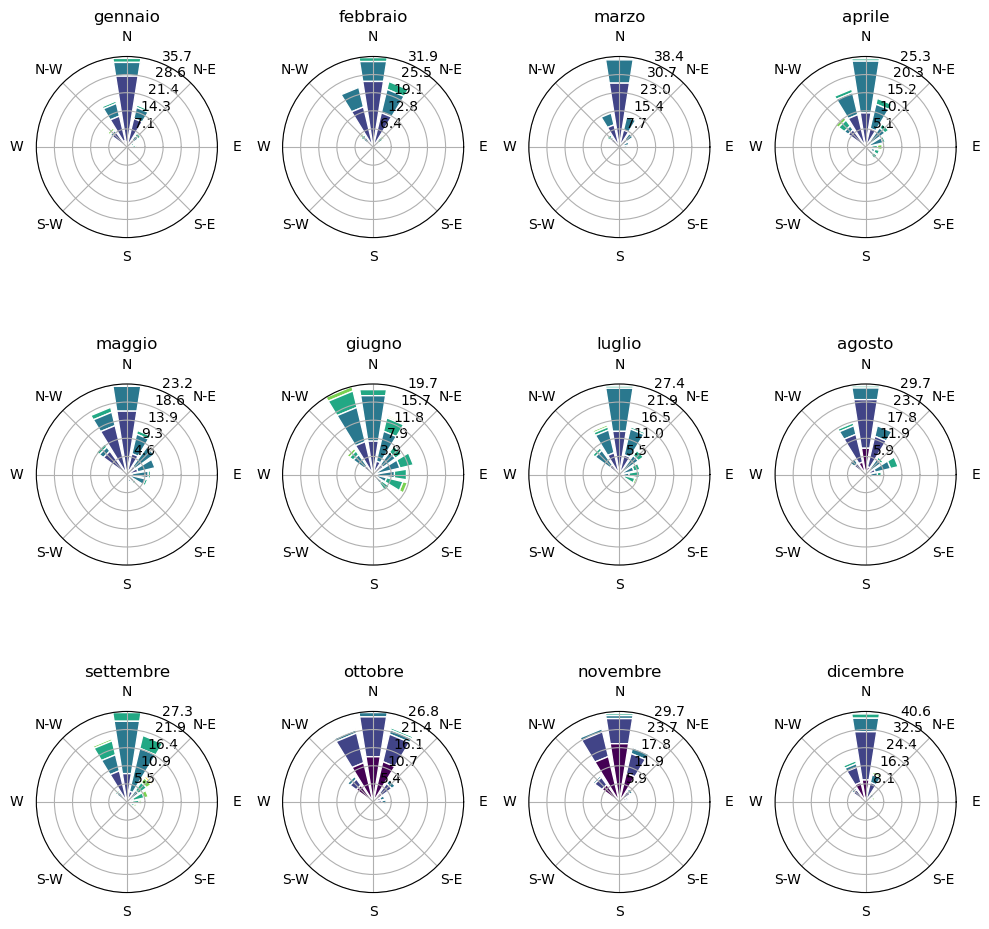

In [66]:
import datetime


fig = plt.figure(figsize=(10,10), tight_layout=True)
for month in range(1,13):
    ax = fig.add_subplot(3, 4, month, projection="windrose")
    ax.bar(
        df.loc[df.index.month == month].direction, 
        df.loc[df.index.month == month].velocity, 
        normed=True, opening=0.8, edgecolor="white", nsector=16
        )
    ax.set_title(datetime.datetime(year=2022,month=month, day=1).strftime("%B"))
    #ax.set_legend(loc='lower center')
#fig.savefig("export/windRose.pdf")

Trento Laste 
Periodo 1/1/2011 - 31/12/2021
Valori ogni 10 o 15 minuti

In [68]:
df_vel = pd.read_csv("windRose/t0129_velocita_tutte.csv" , sep=",", index_col=0,
                skiprows=[0,1,2,3], usecols=[0,1,2], parse_dates=True, 
                names=["date","velocity", "quality_velocity"])

df_dir = pd.read_csv("windRose/t0129_direzione_tutte.csv" , sep=",", index_col=0,
                skiprows=[0,1,2,3], usecols=[0,1,2], parse_dates=True, 
                names=["date","direction", "quality_direction"])

df = df_vel.join(df_dir)
df

,velocity,quality_velocity,direction,quality_direction
date,,,,
2011-01-01 00:15:00,0.5,1.0,3.0,1.0
2011-01-01 00:30:00,0.2,1.0,306.0,1.0
2011-01-01 00:45:00,0.5,1.0,268.0,1.0
2011-01-01 01:00:00,0.8,1.0,13.0,1.0
2011-01-01 01:15:00,1.0,1.0,310.0,1.0
...,...,...,...,...
2021-12-30 23:20:00,2.4,1.0,354.0,1.0
2021-12-30 23:30:00,2.2,1.0,7.0,1.0
2021-12-30 23:40:00,2.0,1.0,15.0,1.0


In [104]:
df.dropna(inplace=True)

In [112]:
df = df.astype({"quality_velocity":"int64", "quality_direction":"int64"})

In [113]:
df.dtypes

velocity             float64
quality_velocity       int64
direction            float64
quality_direction      int64
dtype: object

In [114]:
df.loc[(df.quality_direction == 1) & df.quality_velocity==1]

,velocity,quality_velocity,direction,quality_direction
date,,,,
2011-01-01 00:15:00,0.5,1,3.0,1
2011-01-01 00:30:00,0.2,1,306.0,1
2011-01-01 00:45:00,0.5,1,268.0,1
2011-01-01 01:00:00,0.8,1,13.0,1
2011-01-01 01:15:00,1.0,1,310.0,1
...,...,...,...,...
2021-12-30 23:20:00,2.4,1,354.0,1
2021-12-30 23:30:00,2.2,1,7.0,1
2021-12-30 23:40:00,2.0,1,15.0,1


In [119]:
df.loc[(df.quality_direction != 1) & (df.quality_velocity != 1)]

,velocity,quality_velocity,direction,quality_direction
date,,,,
2014-01-30 20:00:00,0.0,140,0.0,140
2014-01-30 20:10:00,0.0,140,0.0,140
2014-01-30 20:20:00,0.0,140,0.0,140
2014-01-30 20:30:00,0.0,140,0.0,140
2014-01-30 20:40:00,0.0,140,0.0,140
...,...,...,...,...
2018-09-30 23:10:00,0.0,140,0.0,140
2018-09-30 23:20:00,0.0,140,0.0,140
2018-09-30 23:30:00,0.0,140,0.0,140


In [97]:
df.loc[(df.index.hour >= 6) & (df.index.hour <=8)]

,velocity,quality_velocity,direction,quality_direction
date,,,,
2011-01-01 06:00:00,0.3,1.0,8.0,1.0
2011-01-01 06:15:00,0.0,1.0,33.0,1.0
2011-01-01 06:30:00,0.0,1.0,277.0,1.0
2011-01-01 06:45:00,0.0,1.0,244.0,1.0
2011-01-01 07:00:00,0.2,1.0,307.0,1.0
...,...,...,...,...
2021-12-30 08:10:00,1.7,1.0,26.0,1.0
2021-12-30 08:20:00,2.1,1.0,48.0,1.0
2021-12-30 08:30:00,3.1,1.0,62.0,1.0


In [133]:
HOUR_RANGES = [6, 10, 14, 18, 22]
for hour_range_index in range(len(HOUR_RANGES) - 1):
    print(HOUR_RANGES[hour_range_index])

6
10
14
18


In [230]:
df.loc[df.velocity >= 48]

,velocity,quality_velocity,direction,quality_direction
date,,,,
2011-10-31 17:30:00,48.8,140,335.0,1
2011-10-31 17:45:00,48.0,140,14.0,1
2011-10-31 18:30:00,48.6,140,26.0,1
2011-10-31 19:00:00,49.9,140,23.0,1
2012-04-03 23:00:00,51.1,140,307.0,1
2012-05-03 16:00:00,49.0,140,303.0,1
2012-05-03 16:15:00,53.6,140,286.0,1
2012-05-03 16:30:00,53.2,140,296.0,1
2012-05-03 16:45:00,53.0,140,289.0,1


In [228]:
df.loc[df.velocity >= 7]

,velocity,quality_velocity,direction,quality_direction
date,,,,
2011-01-08 22:30:00,7.7,1,33.0,1
2011-01-10 05:00:00,17.0,1,341.0,1
2011-01-10 05:15:00,7.1,1,350.0,1
2011-01-12 01:30:00,7.7,1,31.0,1
2011-01-12 23:15:00,7.0,1,4.0,1
...,...,...,...,...
2021-10-21 00:50:00,7.2,1,63.0,1
2021-10-21 01:00:00,7.8,1,68.0,1
2021-10-21 01:10:00,7.0,1,67.0,1


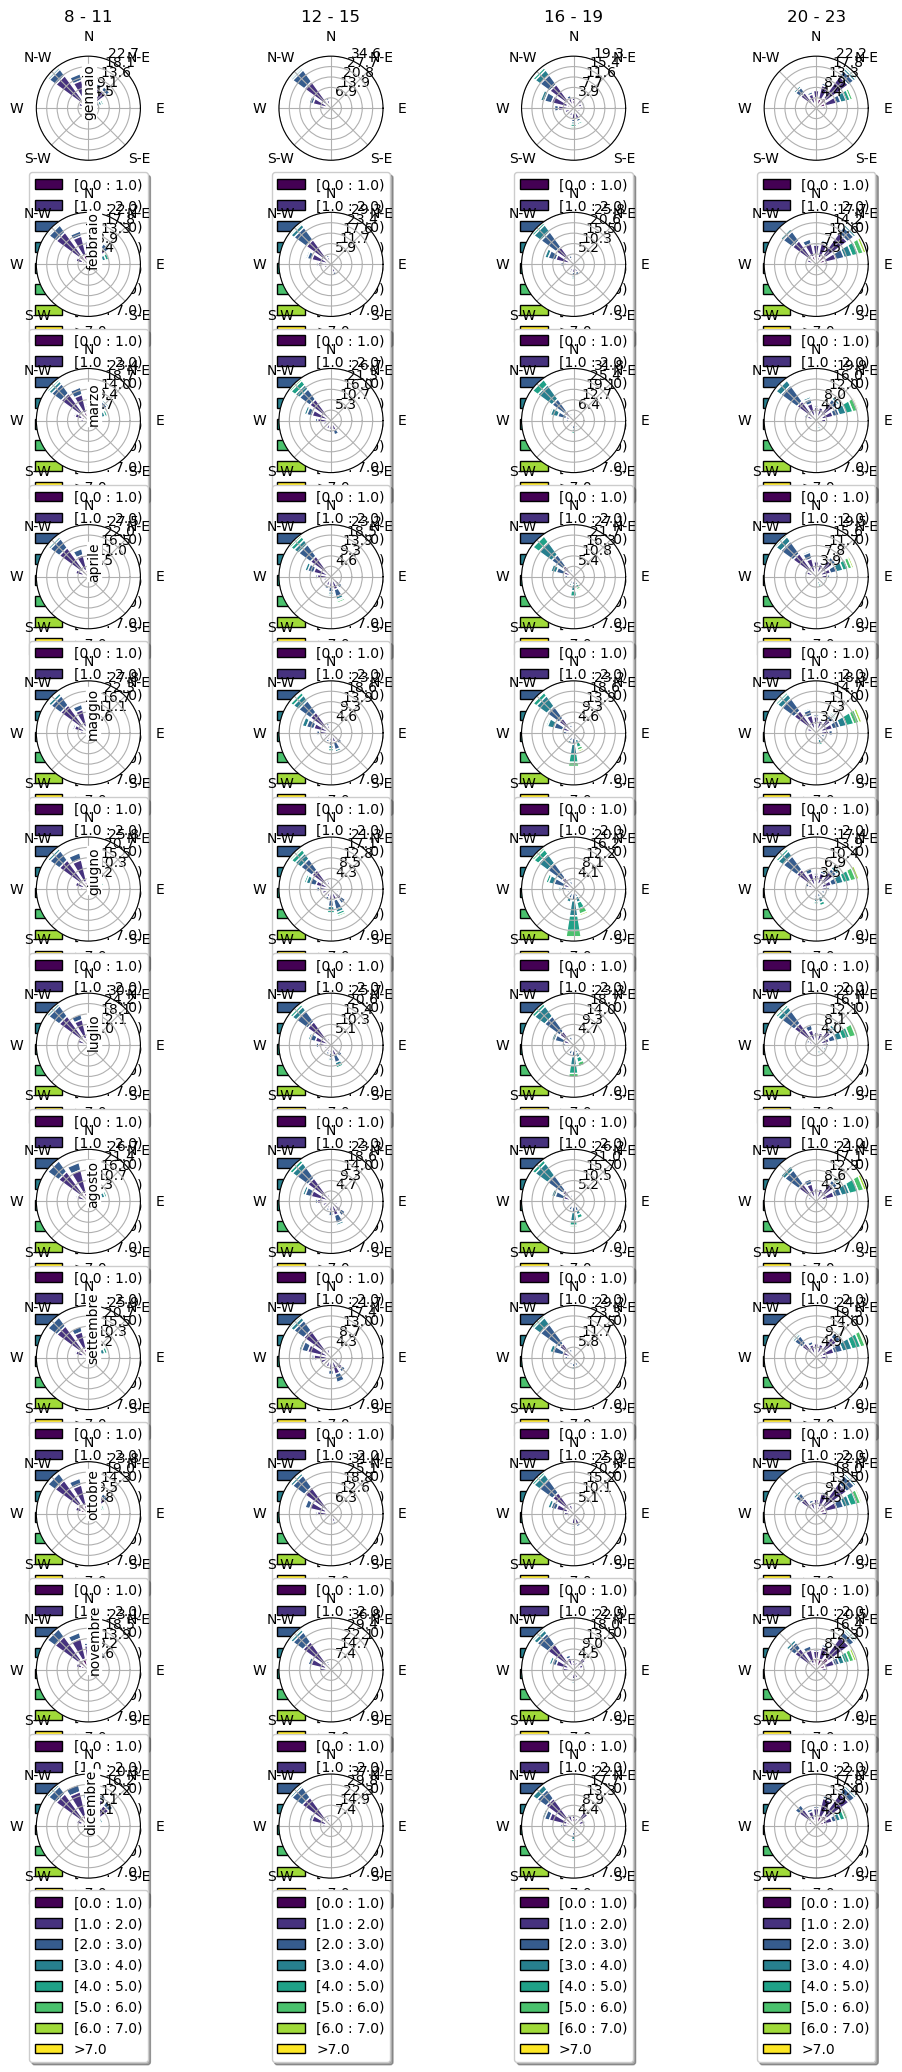

In [229]:
import datetime

HOUR_RANGES = [6, 10, 14, 18, 22] # UTC

bins = np.arange(0, 7+1, 1)

fig = plt.figure(figsize=(12,24))
index = 0
for month in range(1,13):
    for hour_range_index in range(len(HOUR_RANGES) - 1):
        index += 1
        ax = fig.add_subplot(12, 4, index, projection="windrose")
        df_range = df.loc[
                            (df.index.month == month) 
                            & (df.velocity <= 7)
                            & (df.index.hour>=HOUR_RANGES[hour_range_index]) 
                            & (df.index.hour < HOUR_RANGES[hour_range_index + 1])
                        ]
        ax.bar(
                df_range.direction, 
                df_range.velocity, 
                normed=True, opening=0.8, edgecolor="white", nsector=16, bins=bins
            )

        box = ax.get_position()
        ax.set_position([box.x0, box.y0 + box.height * 0.2,
                 box.width, box.height * 0.8])
        
        ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
                   fancybox=True, shadow=True)

        if month == 1:
            ax.set_title(f"{HOUR_RANGES[hour_range_index]+2} - {HOUR_RANGES[hour_range_index+1]-1+2}")
        if hour_range_index == 0:
            ax.text(180,df_range.velocity.values[-1],datetime.datetime(year=2022,month=month, day=1).strftime("%B"), 
                rotation=90, bbox=dict(alpha=1, color="white", pad=0))
        if hour_range_index==0 and month==2:
            ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
                   fancybox=True, shadow=True)

#fig.savefig("export/windRose_test2.pdf")

c:\Users\nicol\miniconda3\envs\myenv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


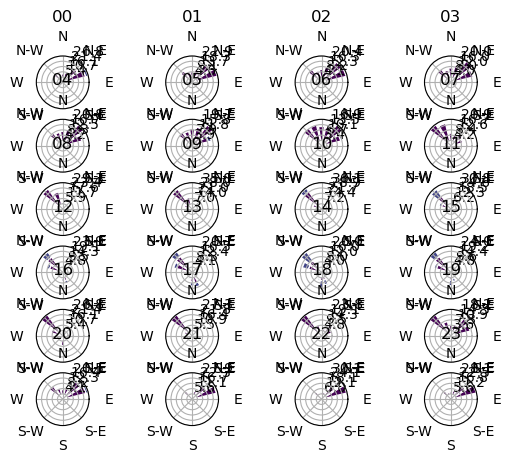

In [158]:
fig = plt.figure(figsize=(21/2.54,29.7/2.54), tight_layout=True)
for hour in range(0,24):
    ax = fig.add_subplot(6, 4, hour+1, projection="windrose")
    ax.bar(
        df.loc[df.index.hour == hour].direction, 
        df.loc[df.index.hour == hour].velocity, 
        normed=True, opening=0.8, edgecolor="white", nsector=16
        )
    ax.set_title(datetime.datetime(year=2022,month=1, day=1, hour=hour).strftime("%H"))

In [154]:
df.loc[(df.quality_velocity!=1) & (df.quality_direction!=1)].count()

velocity             1412
quality_velocity     1412
direction            1412
quality_direction    1412
dtype: int64

In [55]:
df

,velocity,quality_velocity,direction,quality_direction
date,,,,
2012-01-10,1.6,1,341,1
2012-02-10,1.6,1,26,1
2012-03-10,1.6,1,52,1
2012-04-10,3.0,1,58,1
2012-05-10,1.5,1,48,1
...,...,...,...,...
2022-09-27,1.9,1,28,1
2022-09-28,1.2,1,327,1
2022-09-29,1.0,1,340,1
